In [63]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')
from matplotlib.ticker import ScalarFormatter


In [16]:
CONSTANT_NAME = "hmc"

In [17]:
start =2
budget_list = []
for i in range(30):
    new_start = int(start * (1.5))
    if new_start - start > 500:
        start += 500
    else:
        start = new_start
    budget_list.append(start)
max_budget = budget_list[-1]

In [74]:
pdf_errors = {10:{}, 20:{}}
dt_list = {10:{}, 20:{}}
opt_res = {10:{}, 20:{}}
resolution_list = ["mfed_75", "mfed_early_75"]
resolution_list = ["mfed_90", "mfed_50","mfed_75", "mfed_early_75", "mfed", "mfed_early", 2,4,8]
resolution_list = ["mfed",2,4,8]
#resolution_list = ["mfed_early_90"]
resolution_list = ["mfed_early_90", "mfed_early_50","mfed_early_10", "mfed_early"]
melt_rate_list = [ (10,"low"),(20,"high")]


tmp_dir = "08_06_17_54"
for melt_rate,melt_label in melt_rate_list: #, "high"
    for resolution in resolution_list:
    #for resolution in [2,4,8,"mfed", "mfed_75", "mfed_early", "mfed_early_75"]: #, "mfed_75", , "mfed_50" #"mfed", "average", 2,4,8, "mfed_opt",
        tmp = pickle.load(open(f"./../assets/plots_data/fig_7/{tmp_dir}/{melt_label}_{resolution}.pkl", 'rb'))
        pdf_errors[melt_rate][resolution] = tmp["pdf_errors"][melt_rate][resolution]
        dt_list[melt_rate][resolution] = tmp["dt_list"][melt_rate][resolution]
        print(tmp.keys())
        try:
            opt_res[melt_rate][resolution] = tmp["opt_res"][melt_rate][resolution]
        except:
            pass
        #param_list.append()

dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


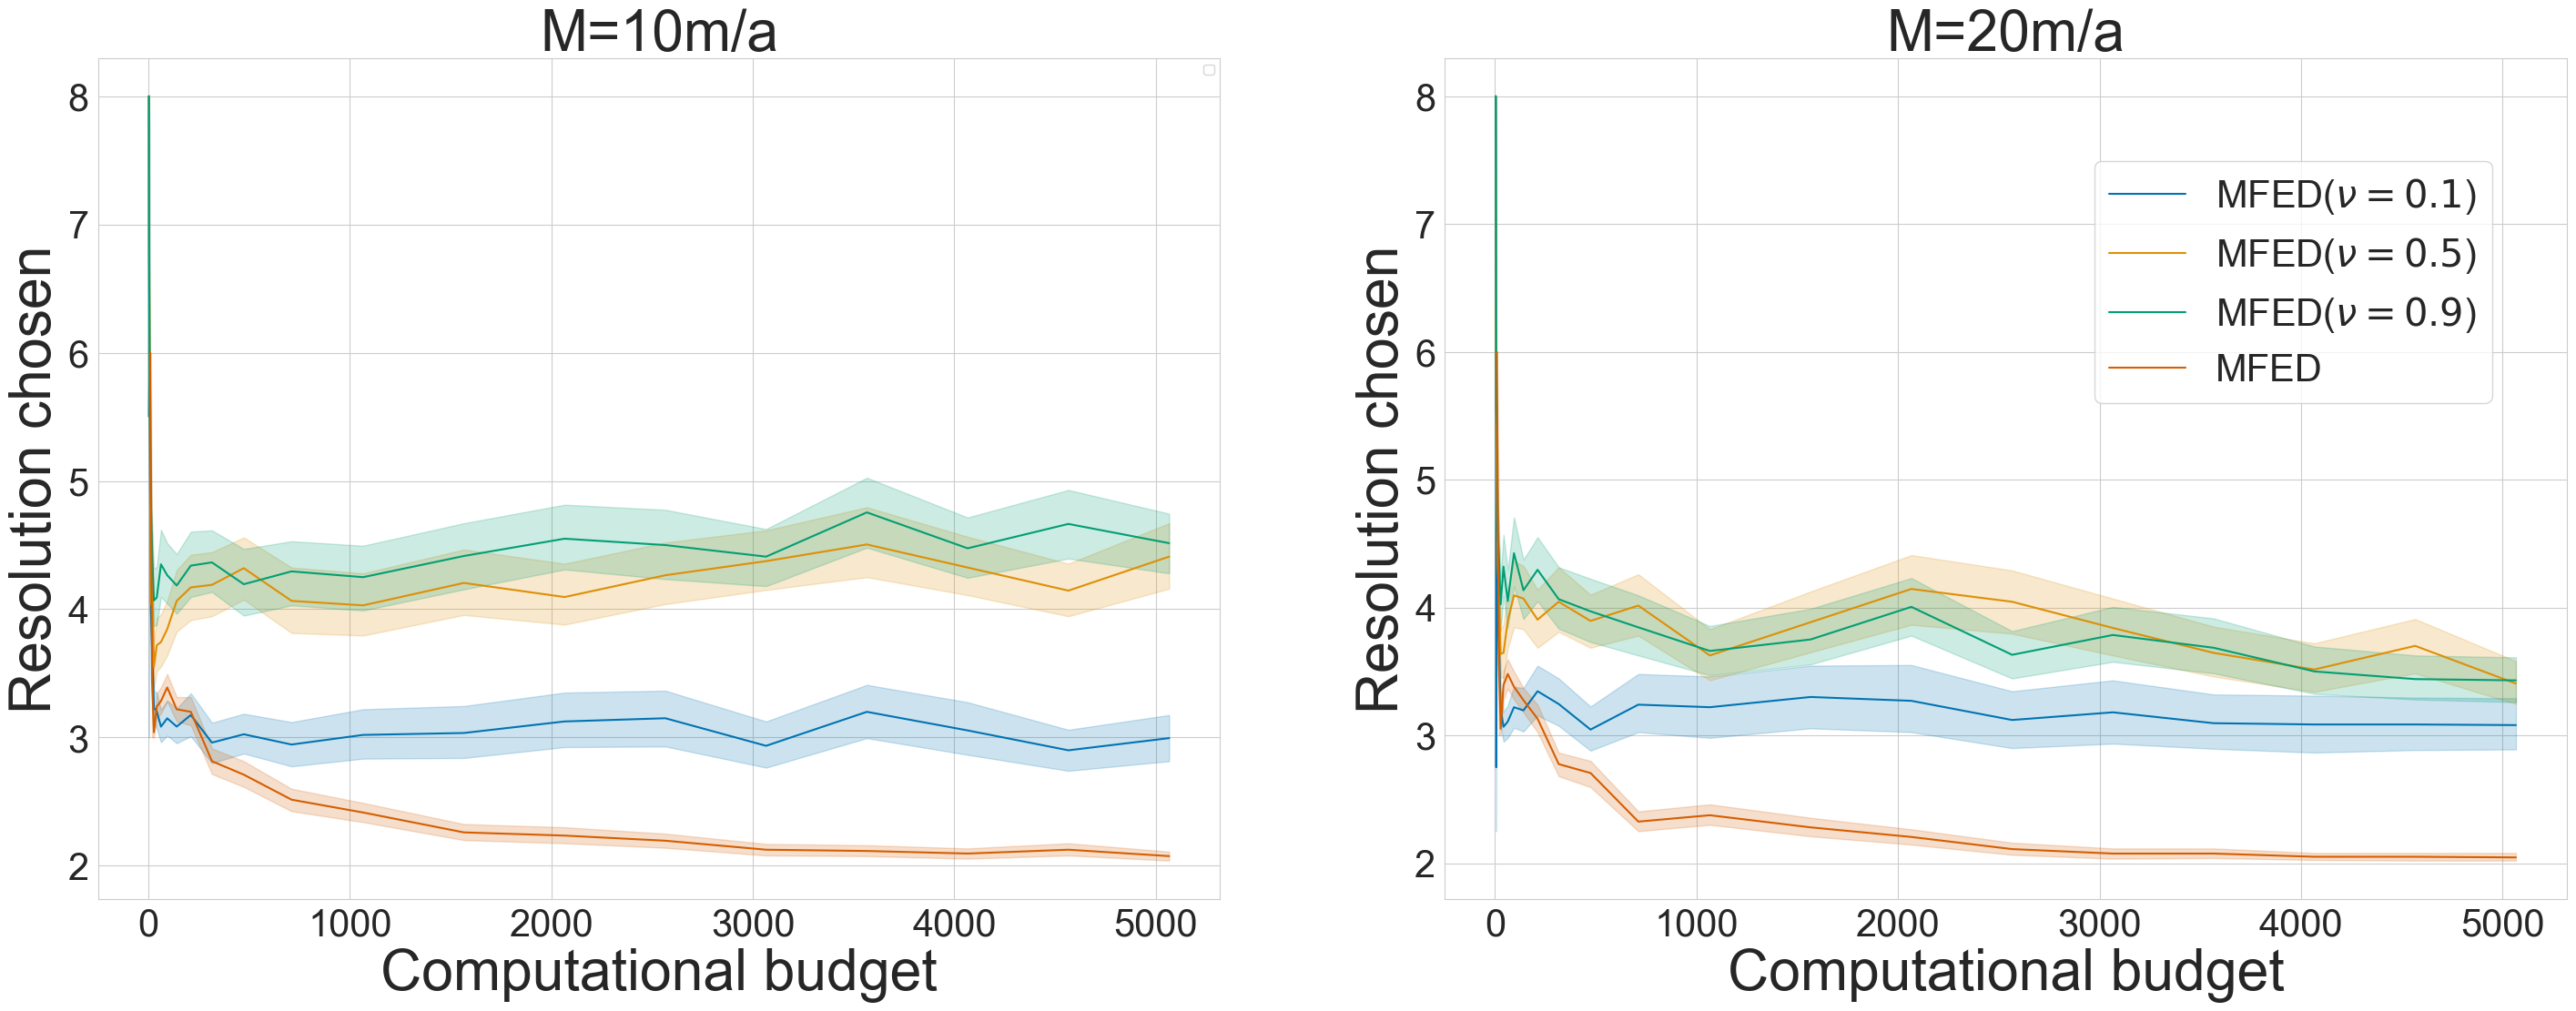

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    padded_data = np.pad(data, (window_size//2, window_size//2), mode='edge')
    return np.convolve(padded_data, window, mode='valid')

data_for_df = []
for melt, _ in melt_rate_list:
    for res in resolution_list:
        tmp = opt_res[melt][res]
        y = []
        x = []
        for idx, budget in enumerate(budget_list):
            try:
                for n in tmp[budget]:
                    data_for_df.append({
                        "resolution": res,
                        "melt": melt,
                        "chosen_res": n,
                        "budget": budget,
                    })
            except:
                continue

plt.figure(figsize=(35,12))

for idx,m in enumerate([10,20]):

    plt.subplot(1,2,idx+1)

    df = pd.DataFrame(data_for_df)
    df_sub = df[df["melt"] == m]

    df_sub.loc[df_sub["resolution"] == "mfed", "resolution"] = "MFED"
    df_sub.loc[df_sub["resolution"] == "mfed_early", "resolution"] = "MFED"
    df_sub.loc[df_sub["resolution"] == "mfed_early_90", "resolution"] = r"MFED($\nu=0.1$)"
    df_sub.loc[df_sub["resolution"] == "mfed_early_10", "resolution"] = r"MFED($\nu=0.9$)"
    df_sub.loc[df_sub["resolution"] == "mfed_early_50", "resolution"] = r"MFED($\nu=0.5$)"
    legend = True if idx == 1 else False
    sns.lineplot(df_sub,x="budget", y="chosen_res", hue="resolution",legend=legend)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel("Computational budget", fontsize=45)
    plt.ylabel("Resolution chosen", fontsize=45)
    if idx ==1:
        plt.legend(bbox_to_anchor=(0.95, 0.9), loc='upper right', fontsize=30, title_fontsize=45)
    else:
        plt.legend()
    plt.title(f"M={m}m/a", fontsize=45)

path = f"./../assets/plots/thesis/{CONSTANT_NAME}/{CONSTANT_NAME}_lengthscale.pdf"

plt.savefig(path,bbox_inches='tight')




               res  budget  melt_label     error
0  MFED($\nu=0.1$)       3          10  0.158746
1  MFED($\nu=0.1$)       4          10  0.230983
2  MFED($\nu=0.1$)       4          10  0.351267
3  MFED($\nu=0.1$)       6          10  0.302834
4  MFED($\nu=0.1$)       6          10  0.147809
10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


20
./../assets/plots/thesis/hmc/hmc_perf.pdf


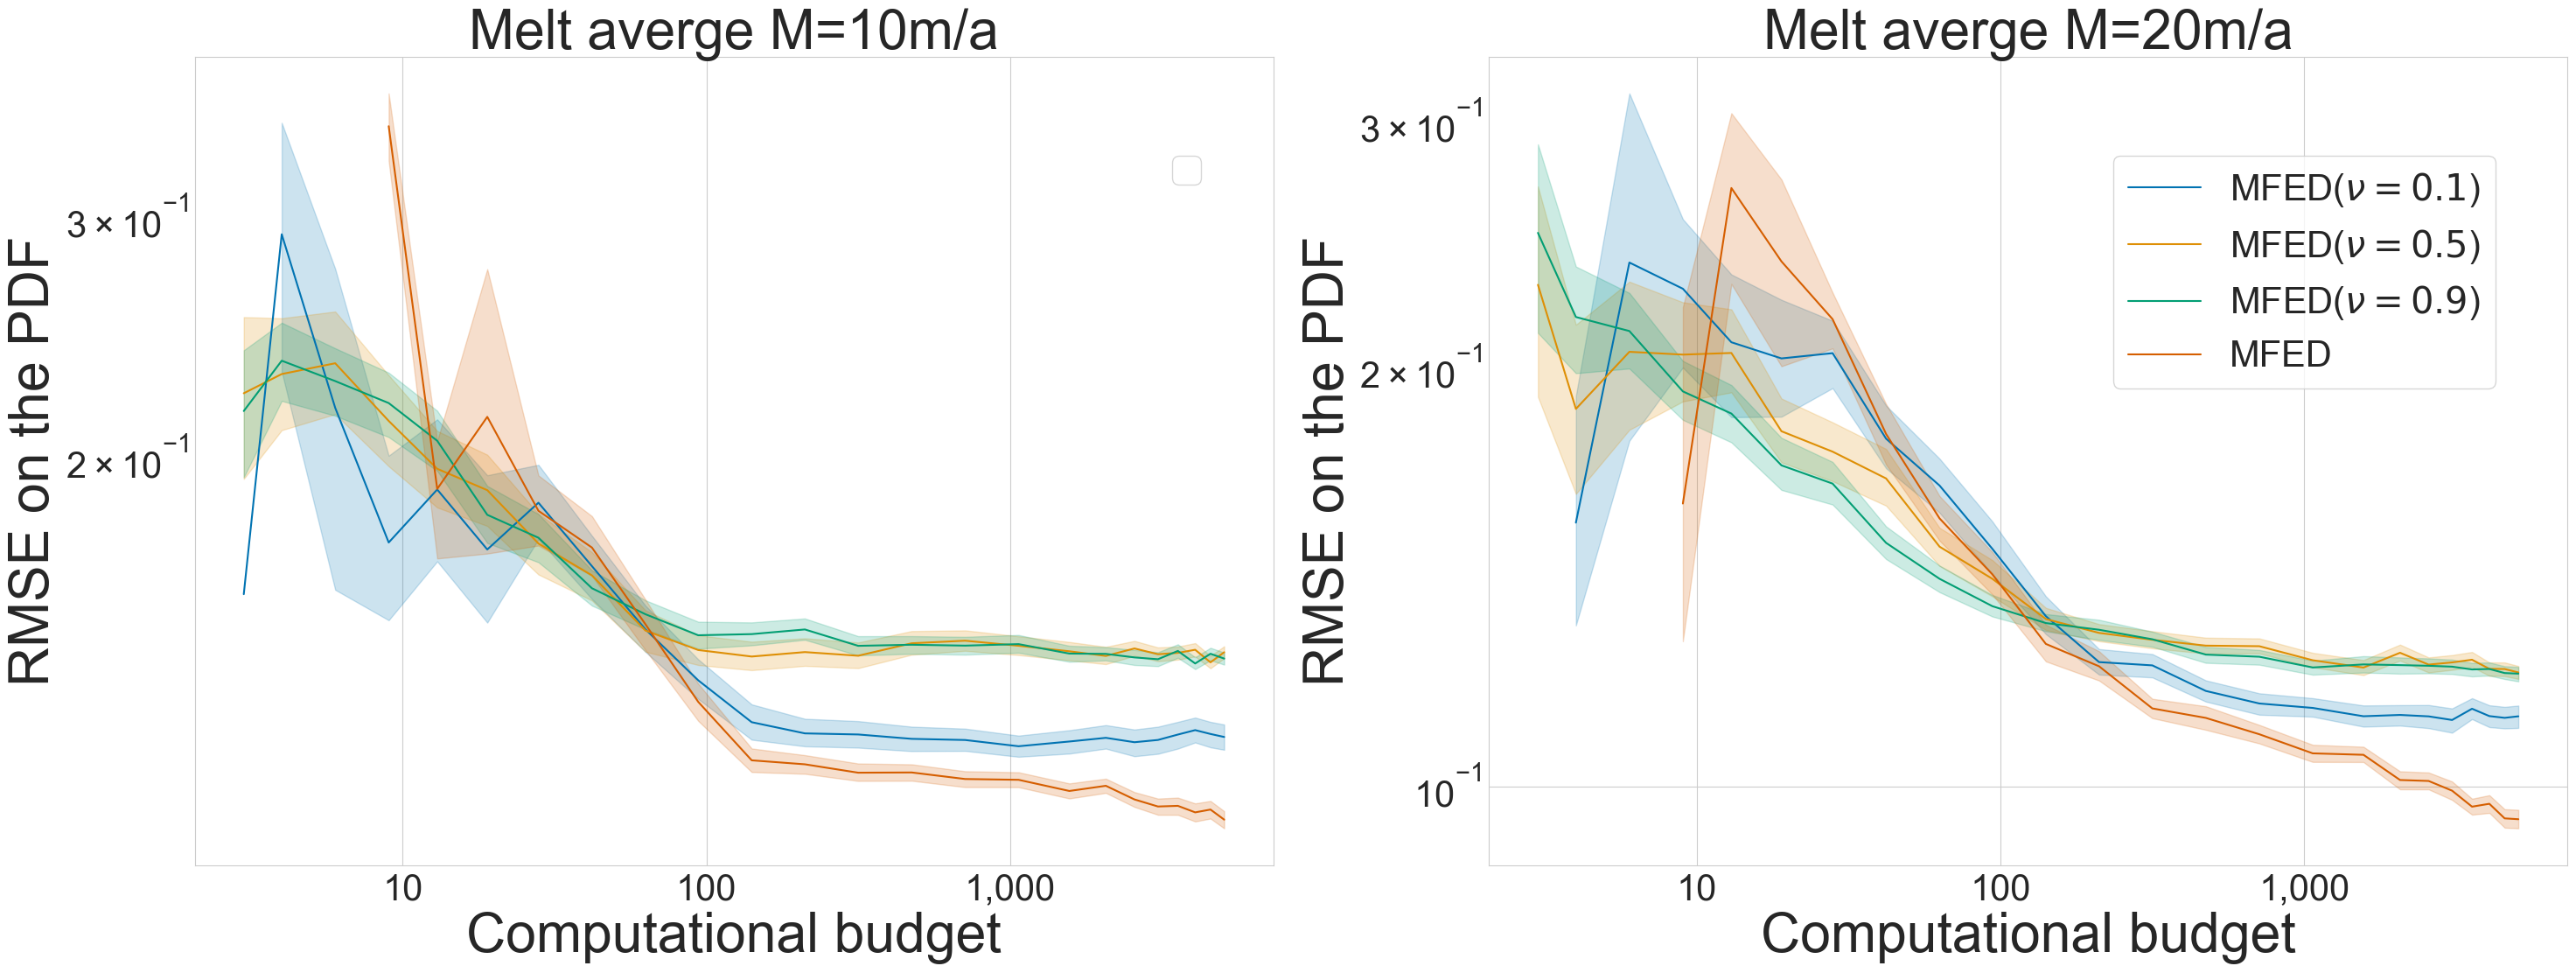

In [76]:

# Initialize an empty list to store the data
data_for_df = []

# Iterate through the pdf_errors dictionary to extract the necessary information
for melt_label, res_dict in pdf_errors.items():
    for res, budget_dict in res_dict.items():
        for budget, error_list in budget_dict.items():
            # For each error in the error_list, append a new record to the list
            if error_list is not None:
                for error in error_list:
                    data_for_df.append({
                        "res": str(res),
                        "budget": budget,
                        "melt_label": melt_label,
                        "error": error
                    })

# Convert the list of data into a pandas DataFrame
pdf_errors_df = pd.DataFrame(data_for_df)

pdf_errors_df.loc[pdf_errors_df["res"] == "mfed", "res"] = "MFED-early"
pdf_errors_df.loc[pdf_errors_df["res"] == "mfed_early", "res"] = "MFED"
pdf_errors_df.loc[pdf_errors_df["res"] == "mfed_early_90", "res"] = r"MFED($\nu=0.1$)"
pdf_errors_df.loc[pdf_errors_df["res"] == "mfed_early_10", "res"] = r"MFED($\nu=0.9$)"
pdf_errors_df.loc[pdf_errors_df["res"] == "mfed_early_50", "res"] = r"MFED($\nu=0.5$)"
# Display the first few rows of the DataFrame to verify
print(pdf_errors_df.head())


sns.set_palette('colorblind')
sns.set_style('whitegrid')
mpl.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(35,12))

for idx, label in enumerate(pdf_errors_df['melt_label'].unique()):
    print(label)
    plt.subplot(1,2,idx+1)
    legend = True if idx == 1 else False
    sns.lineplot(data=pdf_errors_df[pdf_errors_df['melt_label'] == label], x="budget", y="error", hue="res", legend=legend)
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Adjust tick label size
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)

    # Ensure a reasonable number of ticks
    ax.xaxis.set_major_locator(plt.LogLocator(numticks=5))
    #ax.yaxis.set_major_locator(plt.LogLocator(numticks=5))

    # Format tick labels
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:,.0f}"))
    #ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f"{y:.2f}"))  #
    plt.xlabel("Computational budget", fontsize=45)
    plt.ylabel("RMSE on the PDF", fontsize=45)
    plt.legend(bbox_to_anchor=(0.95, 0.9), loc='upper right', fontsize=30, title_fontsize=45)
    plt.title(f"Melt averge M={label}m/a", fontsize=45)
path = f"./../assets/plots/thesis/{CONSTANT_NAME}/{CONSTANT_NAME}_perf.pdf"
print(path)
plt.savefig(path,bbox_inches='tight')